## Starting notebook for reading emotibit data

In [1]:
import sys
sys.path.append('../')
from pyeyemo.gaze.eye import Eye
import pyeyemo.gaze.gaze_commons as gm
import pandas as pd
from pathlib import Path
from itertools import compress
import os
import numpy as np
from os import listdir
from os.path import isfile, join,isdir
import matplotlib.pyplot  as plt


### Get the list of directories we want to analyse and copy paste the information in sessions.tx


In [19]:
## Get the list of directories we want to analyse and copy paste the information in sessions.tx
session_location = Path(r"P:\Proyectos\2020\PY200016 - XSCAPE\Trabajo\00 XPERIMENTS\01 EXPERIMENTS_Santiago\00 COMPLETED\Exp_Stgo_0001\SESSIONS")
data_path=Path(r"data")
subjects=[]
sessions=[]

annotation_list=['Asset','Surprise','Control'] # list of names that have assets

onlyfiles = [f for f in listdir(session_location) if isdir(join(session_location, f))]
for dir in onlyfiles:
 print (dir,flush=True)

ES0001_S003_PC_EM
ES0001_S004_PC_EM
ES0001_S005_PC_EM
ES0001_S006_PC_EM
ES0001_S008_PC_EM
ES0001_S009_PC_EM
ES0001_S010_PC_EM
ES0001_S011_PC_EM
ES0001_S012_PC_EM
ES0001_S013_PC_EM
ES0001_S015_PC_EM
ES0001_S017_PC_EM
ES0001_S018_PC_EM
ES0001_S019_PC_EM
ES0001_S020_PC_EM
ES0001_S022_PC_EM
ES0001_S023_PC_EM
ES0001_S024_PC_EM
ES0001_S025_PC_EM
ES0001_S026_PC_EM
ES0001_S027_PC_EM
ES0001_S028_PC_EM
ES0001_S029_PC_EM
ES0001_S030_PC_EM
ES0001_S031_PC_EM
Excluded
Resguardo_Excell


### Do the automatic analysis for sacades extraction

In [20]:
with open('session.txt','r') as f:
    for session in f:
            sessions.append(session.replace('\n',''))
f.close()
session_loc_list=[session_location.joinpath(session,'00 Raw_data', 'emotibit') for session in sessions ]
# session_loc_list=[session_location.joinpath(session,'01 Processing_data') for session in sessions ]


In [31]:
for session, recording_location in zip(sessions,session_loc_list):
    # data_paths=gm.extract_session_path_pupil_labs(recording_location=recording_location,
    #                                    subject=session)

    #add emotibit data file to path
    data_file_path=[record for record in os.listdir(recording_location)]
    if len(data_file_path)>1:
         Warning('Ambiguity in number of data files')
    recording_location=recording_location.joinpath(data_file_path[0].replace('.csv','')+'_HR.csv')  

    data_paths={'emotibit_data':recording_location}




In [33]:
hr_data=data_paths['emotibit_data']


In [41]:
df=pd.read_csv(hr_data)
df

,LocalTimestamp,EmotiBitTimestamp,PacketNumber,DataLength,TypeTag,ProtocolVersion,DataReliability,HR
0,1.680519e+09,1973887,63117,1,HR,1,100,50
1,1.680519e+09,1974807,63267,1,HR,1,100,52
2,1.680519e+09,1977434,63702,1,HR,1,100,48
3,1.680519e+09,1978474,63868,1,HR,1,100,49
4,1.680519e+09,1979527,64040,1,HR,1,100,50
...,...,...,...,...,...,...,...,...
906,1.680520e+09,2987839,33698,1,HR,1,100,53
907,1.680521e+09,2989373,33966,1,HR,1,100,52
908,1.680521e+09,2990466,34135,1,HR,1,100,52
909,1.680521e+09,2991426,34303,1,HR,1,100,53


<AxesSubplot: xlabel='LocalTimestamp'>

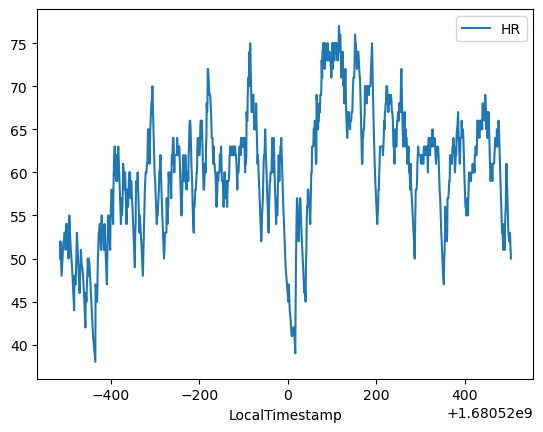

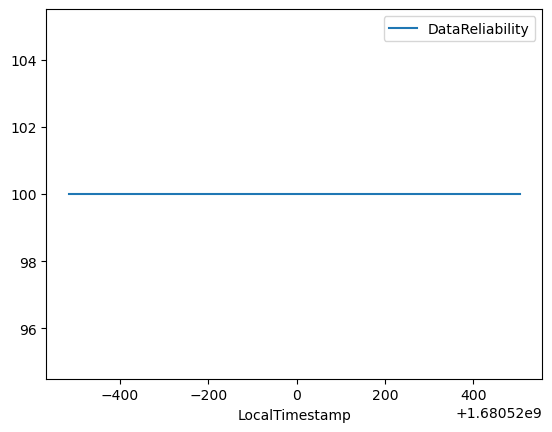

In [43]:
df.plot(x='LocalTimestamp',y='HR')
df.plot(x='LocalTimestamp',y='DataReliability')

In [132]:
import pyxdf
data,header=pyxdf.load_xdf(recording_location)


In [147]:
data[1]

{'info': defaultdict(list,
             {'name': ['pupil_capture'],
              'type': ['Gaze'],
              'channel_count': ['22'],
              'nominal_srate': ['0'],
              'channel_format': ['double64'],
              'source_id': ['0beb6d28-676c-44f8-8258-c7da93c94a71'],
              'version': ['1.1000000000000001'],
              'created_at': ['193.9634442'],
              'uid': ['6402f7e8-fea5-4363-a0b0-5b612ed067c5'],
              'session_id': ['default'],
              'hostname': ['DESKTOP-3LBQOEJ'],
              'v4address': [None],
              'v4data_port': ['16573'],
              'v4service_port': ['16573'],
              'v6address': [None],
              'v6data_port': ['16573'],
              'v6service_port': ['16573'],
              'desc': [defaultdict(list,
                           {'pupil_lsl_relay_version': ['2.3'],
                            'channels': [defaultdict(list,
                                         {'channel': [defaultdi

In [141]:
data_sync=data[3]
gaze=data[1]
fixations=data[2]

In [107]:
data[2]['info']

defaultdict(list,
            {'name': ['pupil_capture_fixations'],
             'type': ['Fixations'],
             'channel_count': ['7'],
             'nominal_srate': ['0'],
             'channel_format': ['double64'],
             'source_id': ['84c04d92-3c63-41ef-ac60-08a23c329d22'],
             'version': ['1.1000000000000001'],
             'created_at': ['9881.3533692000001'],
             'uid': ['73b5e8c2-de44-4d9d-b96d-41a68e4e8d64'],
             'session_id': ['default'],
             'hostname': ['DESKTOP-3LBQOEJ'],
             'v4address': [None],
             'v4data_port': ['16572'],
             'v4service_port': ['16575'],
             'v6address': [None],
             'v6data_port': ['16572'],
             'v6service_port': ['16575'],
             'desc': [defaultdict(list,
                          {'pupil_lsl_relay_version': ['2.3'],
                           'channels': [defaultdict(list,
                                        {'channel': [defaultdict(list,


In [144]:
data_sync['footer']

{'info': defaultdict(list,
             {'first_timestamp': ['2493.0204354'],
              'last_timestamp': ['3203.3081389'],
              'sample_count': ['164'],
              'clock_offsets': [defaultdict(list,
                           {'offset': [defaultdict(list,
                                         {'time': ['2460.44235175'],
                                          'value': ['-1.175000011244265e-05']}),
                             defaultdict(list,
                                         {'time': ['2465.4548861'],
                                          'value': ['-1.660000020820007e-05']}),
                             defaultdict(list,
                                         {'time': ['2470.46650965'],
                                          'value': ['-1.485000007050985e-05']}),
                             defaultdict(list,
                                         {'time': ['2475.466980499999'],
                                          'value': ['-1.5299999

In [151]:
a=gaze['time_series']
a

array([[ 1.00000000e+00,  3.34607324e-01,  7.34717941e-01, ...,
         2.92226083e+01,  3.22630099e+00,  3.02459137e+00],
       [ 1.00000000e+00,  3.36215559e-01,  7.36924271e-01, ...,
         2.92226083e+01,  3.21135720e+00,  3.02459137e+00],
       [ 1.00000000e+00,  3.36233116e-01,  7.36243773e-01, ...,
         2.90989313e+01,  3.21135720e+00,  3.01172699e+00],
       ...,
       [ 0.00000000e+00,  6.95890053e-01, -3.34831377e-01, ...,
                    nan,  3.95481640e-03,             nan],
       [ 0.00000000e+00,  6.95890053e-01, -3.34831377e-01, ...,
                    nan,  3.95481640e-03,             nan],
       [ 0.00000000e+00,  6.95890053e-01, -3.34831377e-01, ...,
                    nan,  3.95481640e-03,             nan]])

In [152]:
b=gaze['time_stamps']
len(b)

185894

In [89]:
s=fixations['footer']
s

{'info': defaultdict(list,
             {'first_timestamp': ['0'],
              'last_timestamp': ['0'],
              'sample_count': ['0'],
              'clock_offsets': [defaultdict(list,
                           {'offset': [defaultdict(list,
                                         {'time': ['11206.18266655'],
                                          'value': ['-4.849999641010072e-06']}),
                             defaultdict(list,
                                         {'time': ['11211.183215'],
                                          'value': ['-1.759999940986745e-05']}),
                             defaultdict(list,
                                         {'time': ['11216.19787335'],
                                          'value': ['-1.454999983252492e-05']}),
                             defaultdict(list,
                                         {'time': ['11221.20030425'],
                                          'value': ['-9.150000551017001e-06']}),
       

In [61]:
data_sync['time_stamps']

array([11754.33466454, 11756.32184454, 11758.32239574, 11764.34099274,
       11766.33856824, 11768.33872204, 11774.35554915, 11776.35563135,
       11778.35528185, 11784.37456285, 11786.37191295, 11788.37194085,
       11794.39194666, 11796.38904666, 11798.38881716, 11804.40639416,
       11806.40576046, 11808.40572857, 11814.42259297, 11816.42199357,
       11818.42197807, 11824.43751247, 11826.42224368, 11828.42245678,
       11834.44484008, 11836.43927278, 11838.43874848, 11844.45602239,
       11846.45559219, 11848.45556799, 11854.47262589, 11856.47216889,
       11858.47232999, 11864.4906273 , 11866.4889219 , 11868.4890463 ,
       11874.5070064 , 11876.5055184 , 11878.5055461 , 11884.52515881,
       11886.52324911, 11888.52257711, 11894.53878471, 11896.54032511,
       11898.53892361, 11904.56059962, 11906.55606192, 11908.55558732,
       11914.57549162, 11916.57233622, 11918.57238023, 11924.59170533,
       11926.58897853, 11928.58908993, 11934.60595983, 11936.60584994,
      

In [120]:
for keys, values in data_sync.items():
    print(keys)


info
footer
time_series
time_stamps


In [122]:
data_sync['footer']

{'info': defaultdict(list,
             {'first_timestamp': ['11754.3346734'],
              'last_timestamp': ['12329.9632187'],
              'sample_count': ['163'],
              'clock_offsets': [defaultdict(list,
                           {'offset': [defaultdict(list,
                                         {'time': ['11206.1827183'],
                                          'value': ['-6.299999768089037e-06']}),
                             defaultdict(list,
                                         {'time': ['11211.183191'],
                                          'value': ['-7.999999979801942e-06']}),
                             defaultdict(list,
                                         {'time': ['11216.19787465'],
                                          'value': ['-1.115000031859381e-05']}),
                             defaultdict(list,
                                         {'time': ['11221.200296'],
                                          'value': ['-9.200000931

In [ ]:
def lsl_to_df(da:dict):
    pass